Valor de la propina: 
19.847607361963192


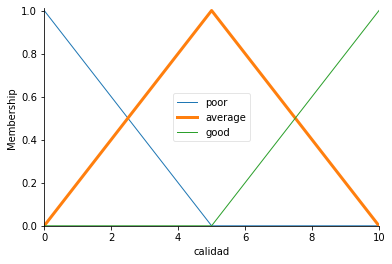

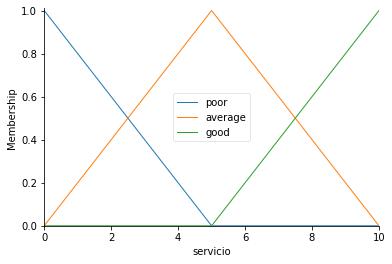

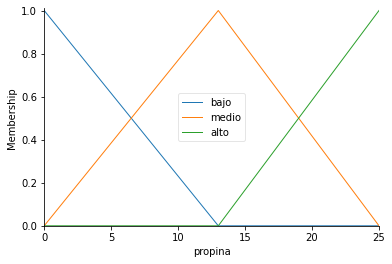

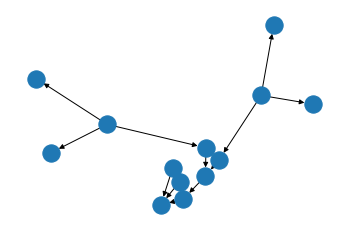

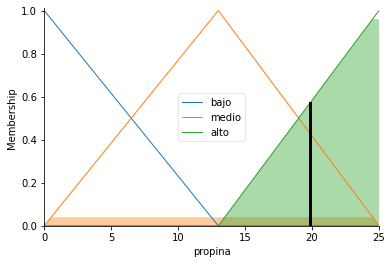

In [6]:
# CONTROL DIFUSO API
!pip install scikit-fuzzy

# Elimina las advertencias
import warnings
warnings.filterwarnings('ignore')

#Importa las librerias
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline

# Se crean los objetos antecedentes y consecuente a partir de las
# variables del universo y las funciones de membresia
calidad = ctrl.Antecedent(np.arange(0,11,1), 'calidad')
servicio = ctrl.Antecedent(np.arange(0,11,1), 'servicio')
propina = ctrl.Consequent(np.arange(0,26,1), 'propina')

# La poblacion de la funcion de membresia automatica es posible con .automf (3,5 o 7)
calidad.automf(3)
servicio.automf(3)

# Las funciones de membresia personalizadas se pueden construir interactivamente con la
# API Pythonic
propina['bajo'] = fuzz.trimf(propina.universe, [0,0,13])
propina['medio'] = fuzz.trimf(propina.universe, [0,13,25])
propina['alto'] = fuzz.trimf(propina.universe, [13,25,25])

# Visualizacion con .view()
calidad['average'].view()
servicio.view()
propina.view()

# Creacion de las reglas
regla1 = ctrl.Rule(calidad['poor'] | servicio['poor'], propina['bajo'])
regla2 = ctrl.Rule(servicio['average'], propina['medio'])
regla3 = ctrl.Rule(servicio['good'] | calidad['good'], propina['alto'])

# Visualizacion de la regla 1
regla1.view()

# Generacion del simulador
control_propina = ctrl.ControlSystem([regla1, regla2, regla3])
asignacion_propina = ctrl.ControlSystemSimulation(control_propina)


# Pasar entradas al ControlSystem usando etiquetas 'Antecedent' con Pythonic API
# Nota: si quiere pasar muchas entradas a la vez, usar .inputs (dict_of_data)
asignacion_propina.input['calidad'] = 6.5
asignacion_propina.input['servicio'] = 9.8

# Se obtiene el valor
asignacion_propina.compute()

# Se muestra la informacion
print("Valor de la propina: ")
print (asignacion_propina.output['propina'])

# Se muestra la curva de asignacion de propina
propina.view(sim = asignacion_propina)